# Data Science Final Report Project

## Introduction

A group of our UBC, led by Frank Wood, has created a Minecraft server with the aim of collecting useful data on how players play video games. Each player's activity is logged as they play the game and interact with the world, which has contributed to a rich set of data that will be used today to answer the second area of interest; Which types of players are most likely to contribute a large amount of data on the Minecraft server. To do this, I would like to examine and focus the relationship between the variables aAge against Played Hours, to see if an indivudals age impacts the number of hours someone will play and therefore, how much data a player will contribute to the data set. 

## Question
This dataset is used to answer the question:
Can a player's age predict how many hours they contribute to the dataset? My goal with this question is to be able to identify the typical person,  based on Age and experience that will be the most contributing allowing the research team to focus their recruitment efforts on the most valuable participants.




## Dataset Description: 
The dataset collected by the research group consists of two filers - Players.csv and Sessions.csv but for my analysis, I will be using players.csv. Players.csv is a dataset with 7 variables and 196 observations. 
The dataset includes 7 variables. 

| Variable      | Data Type            | Description                                                       |
| ------------- | -------------------- | ----------------------------------------------------------------- |
| experience    | Categorical (chr)    | Player’s self-reported experience level (e.g., “Beginner”, “Pro”) |
| subscribe     | Logical (TRUE/FALSE) | Indicates whether the player subscribed to updates                |
| hashedEmail   | Categorical (chr)    | Anonymized player email (not used in analysis)                    |
| played\_hours | Numeric (dbl)        | Total hours spent on the server (used as the response variable)   |
| name          | Categorical (chr)    | Player’s first name (not used in analysis)                        |
| gender        | Categorical (chr)    | Player’s self-identified gender                                   |
| Age           | Numeric (dbl)        | Player’s age in years (used as a predictor variable)              |





In [1]:
library(tidyverse)
library(repr)
library(dplyr)
library(tidymodels) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Data Wrangling

In [2]:
players_data<-read_csv("data/players.csv")

players_data


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


In [3]:
players_data<-players_data|>
select(Age, played_hours)|>
mutate(Age = as.numeric(Age),played_hours = as.numeric(played_hours))|>
filter(!is.na(Age), !is.na(played_hours))

players_data

Age,played_hours
<dbl>,<dbl>
9,30.3
17,3.8
17,0.0
21,0.7
21,0.1
17,0.0
19,0.0
21,0.0
17,0.1


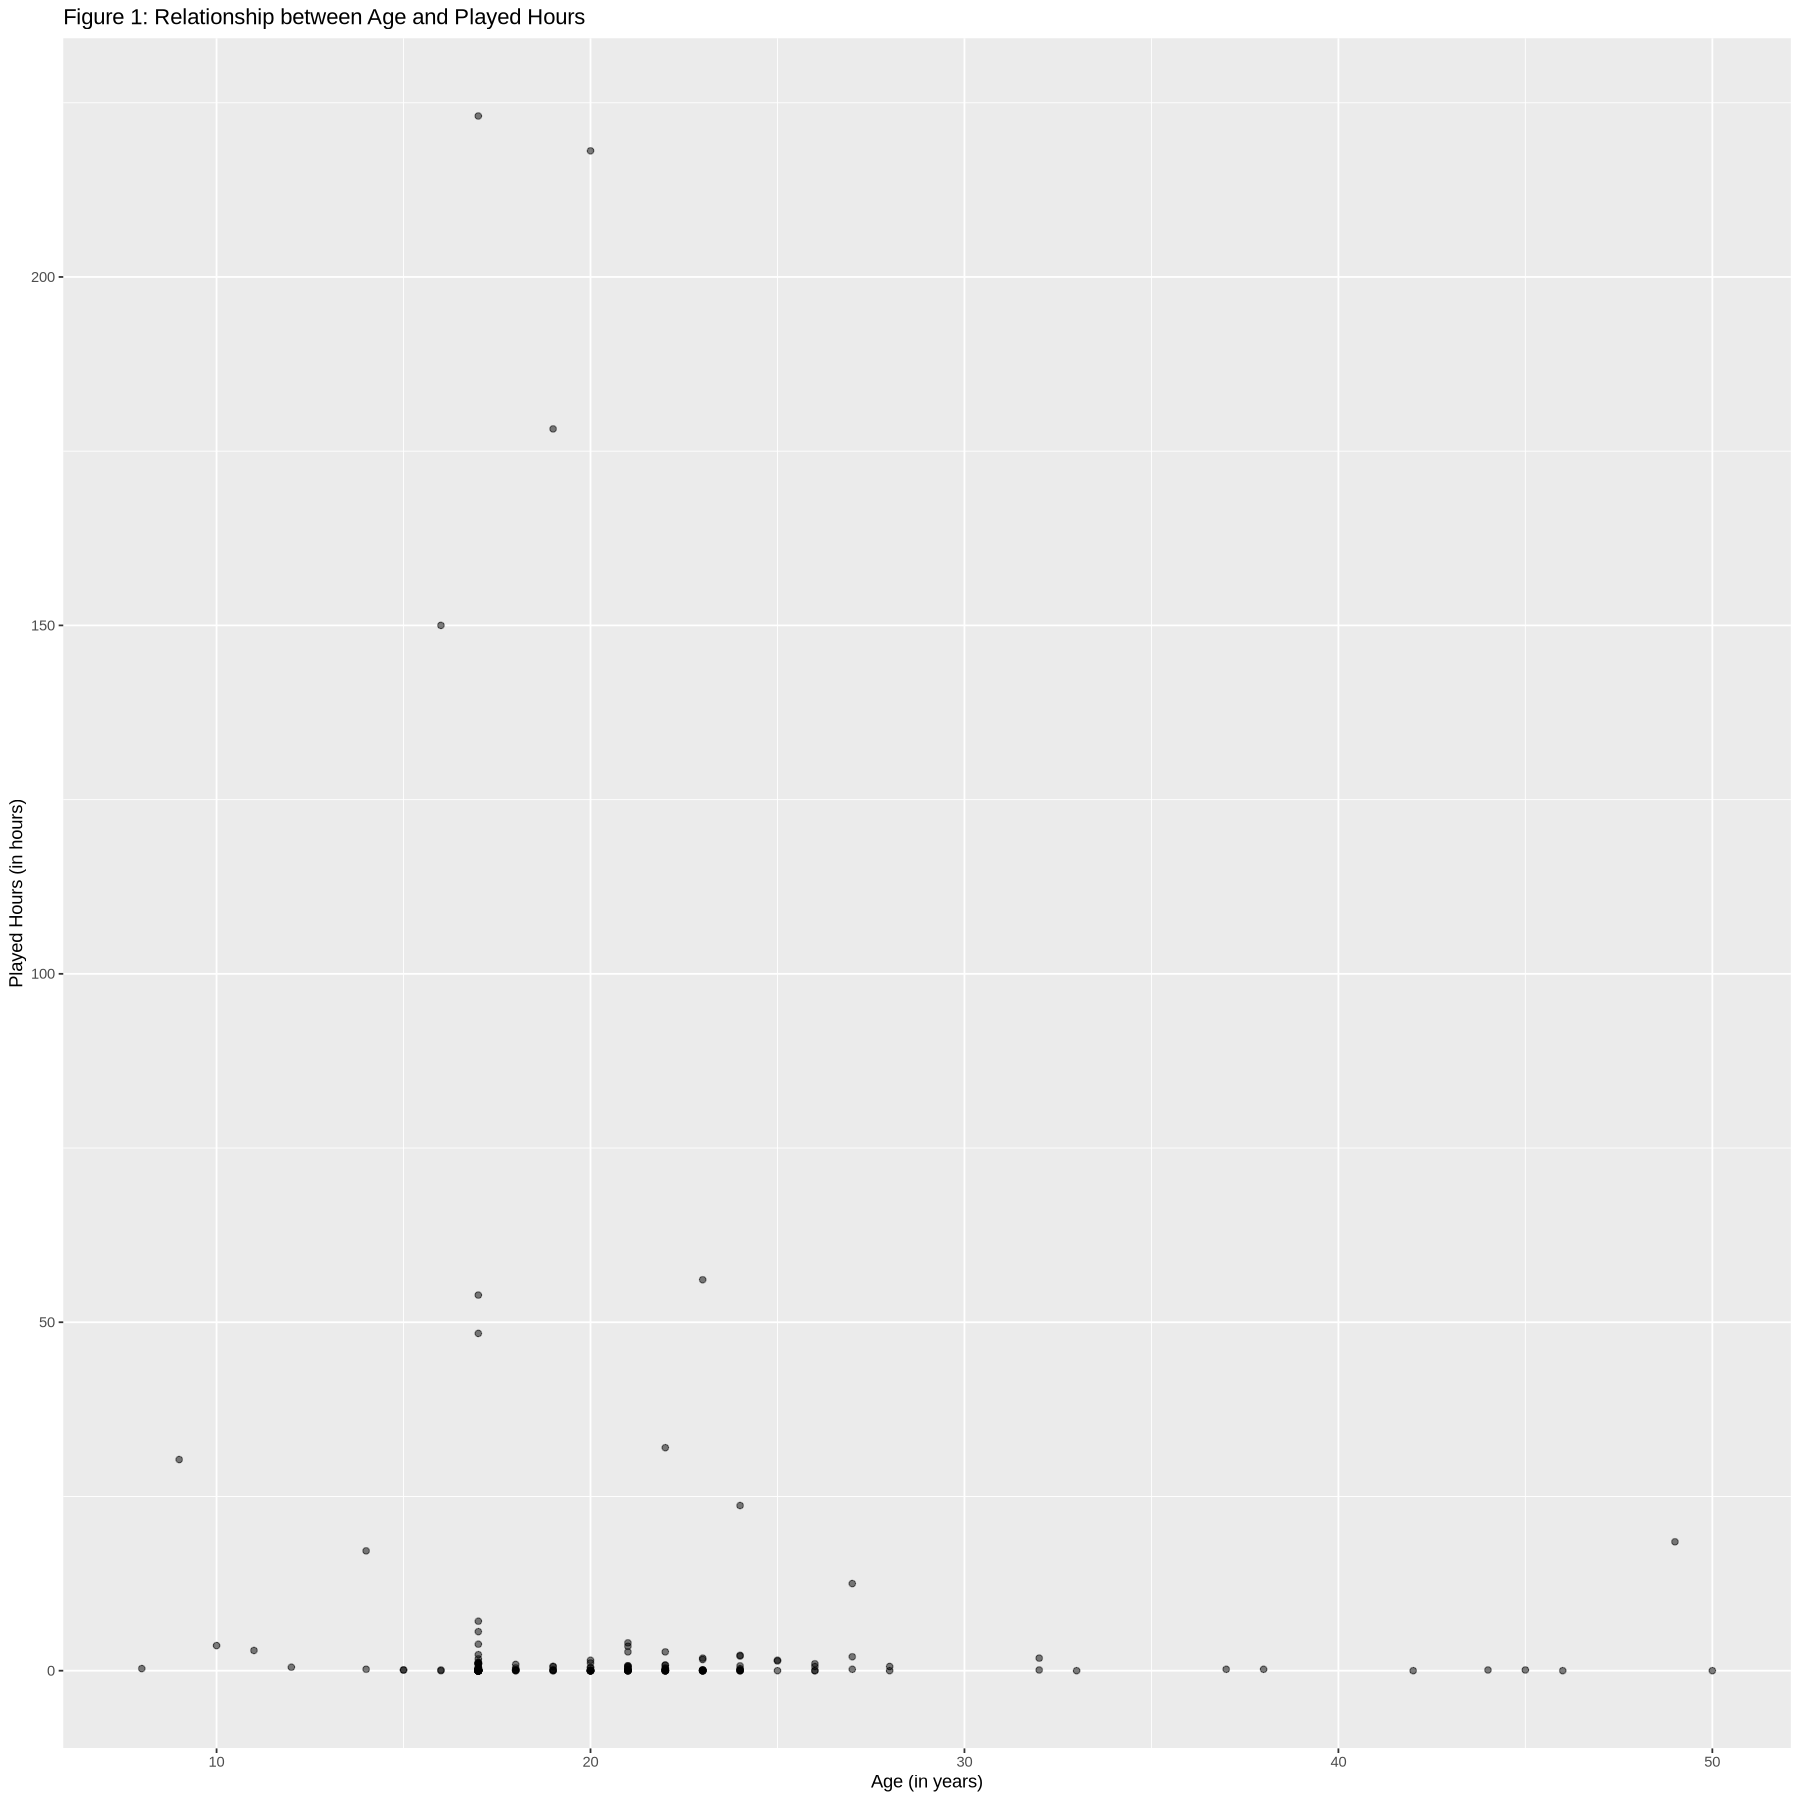

In [4]:
options(repr.plot.width = 15, repr.plot.height = 15)
players_plot<- players_data|>
ggplot(aes(x=Age,  y= played_hours)) +
  geom_point(alpha = 0.5, na.rm = TRUE) +
  labs(title = "Figure 1: Relationship between Age and Played Hours",
    x = "Age (in years)",
    y = "Played Hours (in hours)")

players_plot

I started by importing the CSV with read_csv("data/players.csv") to load my dataset into R. Next, I called select(Age, played_hours) from dplyr to keep only the two variables I need, and used mutate(Age = as.numeric(Age), played_hours = as.numeric(played_hours)) to make both of these variablesnumeric to guarantee R treats them as continuous for plotting and modeling. Next, I visualised my data and to give my scatterplot plenty of room, I set options(repr.plot.width = 15, repr.plot.height = 15), which expands the output area. For the plot itself, I built a ggplot(aes(x = Age, y = played_hours)) object, added geom_point(alpha = 0.5, na.rm = TRUE) so overlapping points become semi-transparent and any missing values are ignored, and finished with labs() to supply a clear title and axis labels to ensure that my visualisation was clear to follow. However,  I think the main issue with my visualisation is how densely clustered some of the points are which makes it difficult to interpret. I tried to mitigate this by changing the plot height and width, but, if I had the skills, I'd want to figure out a way to fix this. Since I didn't notice a strong linear relationship, I will next use knn regression and also try to use linear regression just to see. 


## KNN Regression

In [5]:
set.seed(123)
split         <- initial_split(players_data, prop = 0.8)
players_train <- training(split)
players_test  <- testing(split)

knn_recipe <- recipe(played_hours ~ Age, data = players_train) |>
  step_scale(all_predictors())|>
  step_center(all_predictors())


knn_spec <- nearest_neighbor(
    weight_func = "rectangular",
    neighbors   = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

knn_workflow <- workflow() |>
  add_model(knn_spec) |>
  add_recipe(knn_recipe)

knn_folds <- vfold_cv(players_train, v = 5)

knn_results <- tune_grid(
  knn_workflow,
  resamples = knn_folds,
  grid      = tibble(neighbors = 1:10),
  metrics   = metric_set(rmse)
)

best_k <- knn_results |>
  select_best("rmse") |>
  pull(neighbors)
#Best K=10

final_knn_spec <- nearest_neighbor(
    mode      = "regression",
    neighbors = best_k
  ) |>
  set_engine("kknn")

final_knn_workflow <- workflow() |>
  add_model(final_knn_spec) |>
  add_recipe(knn_recipe)

final_knn_fit <- final_knn_workflow |>
  fit(data = players_train)

knn_rmse <- predict(final_knn_fit, players_test) |>
  bind_cols(players_test) |>
  metrics(truth = played_hours, estimate = .pred) |>
  filter(.metric == "rmse") |>
  pull(.estimate)

knn_rmse


[1] 36.9443

## Linear Regression


In [6]:
set.seed(123)
split         <- initial_split(players_data, prop = 0.8)
players_train <- training(split)
players_test  <- testing(split)

lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lm_wf <- workflow() |>
  add_model(lm_spec) |>
  add_formula(played_hours ~ Age)

lm_fit <- lm_wf |>
  fit(data = players_train)

lm_rmse <- lm_fit |>
  predict(players_test) |>
  bind_cols(players_test) |>
  rmse(truth = played_hours, estimate = .pred) |>
  pull(.estimate)

lm_rmse

[1] 35.94412

Based on the RMSE of both regression types, linear and knn, it's apparent that Linear regression is a better analysis tool for this dataset. Lower RMSE means the model’s predictions are, on average, closer to the true values, so it’s a better fit. RMSE measures the square-root of average squared errors, so a smaller number indicates smaller prediction errors and in this case, linear regression has an RMSE of 35.9 while KNN regression has an RMSE of 36.9. 

`geom_smooth()` using formula = 'y ~ x'


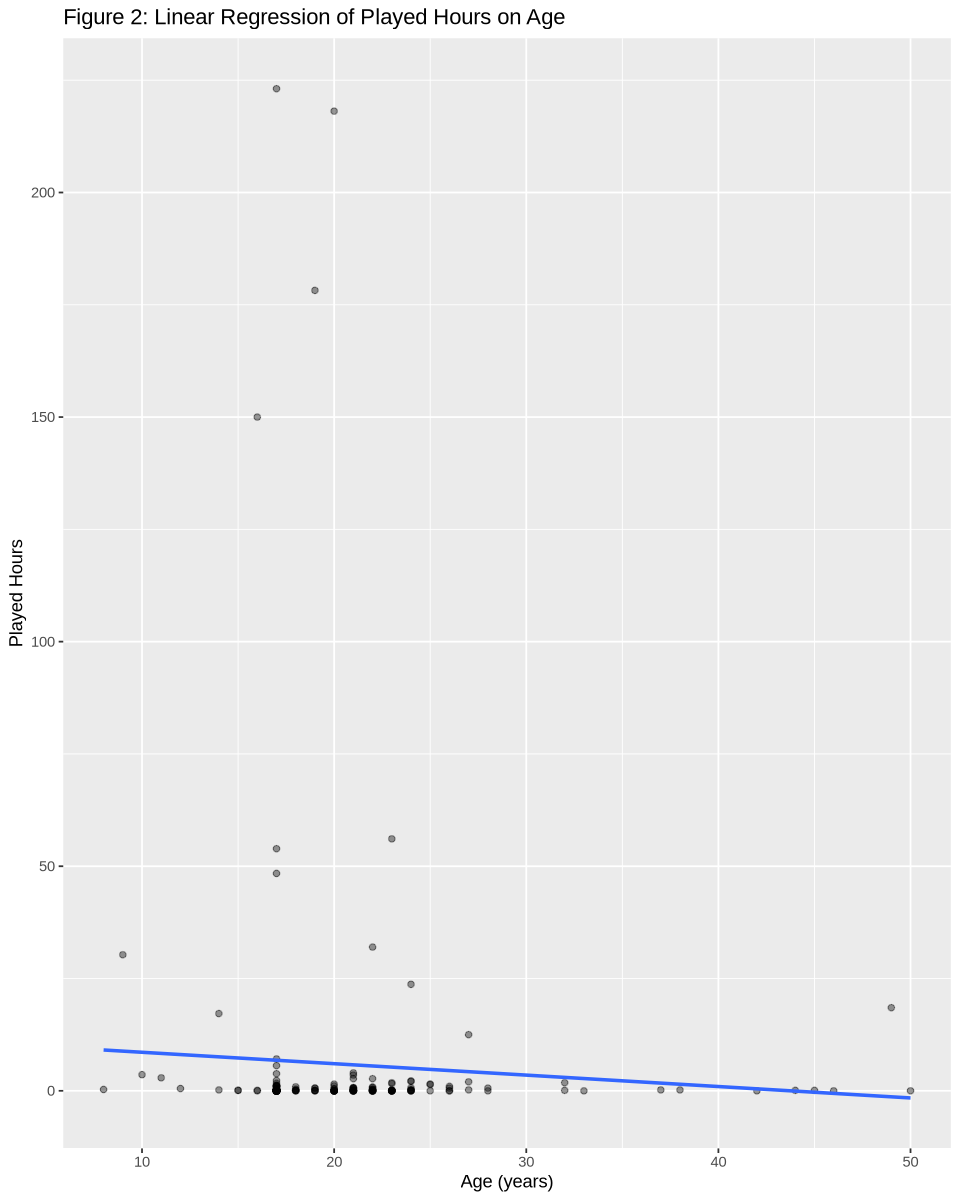

In [7]:
library(ggplot2)
options(repr.plot.height=10, repr.plot.width=8)
linear_reg_plot<-ggplot(players_data, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.4) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Figure 2: Linear Regression of Played Hours on Age",
    x     = "Age (years)",
    y     = "Played Hours") 

linear_reg_plot

I chose simple linear regression because my goal was to predict a continuous outcome (played_hours) from one continuous predictor (Age). I performed a KNN regression and linear regression and ultimately chose linear regression because it had a lower RMSE. This method assumes that  played_hours changes linearly with Age and that errors are independent and roughly the same size at all ages. I think the main weakness of this is how high the RMSE is and that it can't really capture any non-linear aspects of the data set. Its main weakness is that it can’t capture curves or other factors not in the model. For the linear regression, I split my data on an 80-20 basis into training and testing data and made my workflow to then test on the test data. For KNN regression, I did that as well and used cross validation to find the k value that would minimize RMSE. 
